<b>The goal of this NLP project is to build a small search engine - a function called “search” to search for tweets based query. The first stage is to implement my own TF-IDF vectorizer (without using Sklrearn), by creating a function that would receive a corpus (list of strings) and the minimal word frequency (words that would occur fewer than this number of times in the corpus will be ignored). This function won’t be used for very large corpus (won’t use sparse matrices).</b>

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics.pairwise import cosine_similarity
from itertools import chain
import io

In [2]:
with open ('tweets.txt', 'r') as file:
    data = file.read()

<b>Text cleaning</b>

In [3]:
def TextClean(tweet):
    tweet = re.sub('RT @(.*): ', '' ,tweet)
    tweet = re.sub(r'https?:\/.*', '', tweet)
    tweet = re.sub('[''^a-zA-Z \n]','' ,tweet)
    tweet = tweet.lower()
    return tweet

clean_data = TextClean(data)
tweets_list = clean_data.split("\n")

<b>Let's create a dictionary with a mapping of words to ids</b>

In [4]:
def Vocab(clean_data):
    vocab = dict()
    i_d = 0
    clean_words = clean_data.split()
    for w in clean_words:
        if w not in vocab:
            vocab[w] = i_d
            i_d += 1
    return vocab

vocab = Vocab(clean_data)


<b>Document Frequency: a vector of size len(vocab) containing the number of
documents holding the corresponding word</b>

In [5]:
def DocFreq(clean_data, vocab):
    doc_freq = np.zeros(len(vocab.keys()), dtype=int)
    clean_tweets = clean_data.split("\n")    
    for t in clean_tweets:
        uniq_w = np.unique(t.split())
        for w in uniq_w:
            doc_freq[vocab[w]]+=1
    return doc_freq

doc_freq = DocFreq(clean_data, vocab)

<b>Word frequency: a vector containing the number of times each word is found in the
corpus</b>

In [6]:
def WordFreq(clean_data, vocab):
    word_freq = np.zeros(len(vocab.keys()), dtype=int)
    clean_tweets = clean_data.split("\n")
    for t in clean_tweets:
        split_tweet = t.split()
        for w in split_tweet:
            word_freq[vocab[w]]+=1
    return word_freq

word_freq = WordFreq(clean_data, vocab)

<b>Matrix of shape len(documents) x len(vocab) with TF-IDF values for every document
in the corpus</b>

In [7]:
def Tf(clean_tweet, min_word_freq):
    tf = np.zeros(len(vocab.keys()), dtype=int)
    clean_tweet_split = clean_tweet.split()
    if (len(clean_tweet_split) == 0):
        return tf
    for word in clean_tweet_split:
        if word_freq[vocab[word]] > min_word_freq:
            tf[vocab[word]] += 1
    return tf / len(clean_tweet_split)
    
def TfIdf(clean_data, min_word_freq):
    clean_data_split = clean_data.split("\n")
    N_docs = len(clean_data_split)
    df = DocFreq(clean_data, vocab) / N_docs
    idf = np.log(N_docs / (df + 1))
    tf_idf = [Tf(tweet,min_word_freq)*idf for tweet in clean_data_split]
    return np.array(tf_idf)

tf_idf = TfIdf(clean_data,5)


<b>TF-IDF vectorizer</b>

In [8]:
def tfidf_vectorizer(corpus, min_word_freq):
    
    return vocab, doc_freq, word_freq, tf_idf


<b>Test the vectorizer</b>

In [9]:
#vocab
tfidf_vectorizer(clean_data, 5)[0]

{'indirect': 0,
 'cost': 1,
 'of': 2,
 'the': 3,
 'uk': 4,
 'being': 5,
 'in': 6,
 'eu': 7,
 'is': 8,
 'estimated': 9,
 'to': 10,
 'be': 11,
 'costing': 12,
 'britain': 13,
 'billion': 14,
 'per': 15,
 'year': 16,
 'betteroffout': 17,
 'ukip': 18,
 'video': 19,
 'sturgeon': 20,
 'on': 21,
 'postelection': 22,
 'deals': 23,
 'economy': 24,
 'was': 25,
 'growing': 26,
 'times': 27,
 'faster': 28,
 'day': 29,
 'david': 30,
 'cameron': 31,
 'became': 32,
 'prime': 33,
 'minister': 34,
 'than': 35,
 'it': 36,
 'today': 37,
 'bbcqt': 38,
 'east': 39,
 'lothian': 40,
 'candidate': 41,
 'looks': 42,
 'about': 43,
 'and': 44,
 'still': 45,
 'has': 46,
 'an': 47,
 'msn': 48,
 'addy': 49,
 'ukips': 50,
 'housing': 51,
 'spokesman': 52,
 'rakes': 53,
 'k': 54,
 'benefit': 55,
 'from': 56,
 'migrants': 57,
 'make': 58,
 'sure': 59,
 'you': 60,
 'tune': 61,
 'asknigelfarage': 62,
 'tonight': 63,
 'bbc': 64,
 'at': 65,
 'ed': 66,
 'milliband': 67,
 'embarrassment': 68,
 'would': 69,
 'want': 70,
 'hi

In [10]:
#doc freq
tfidf_vectorizer(clean_data, 5)[1]

array([   1,   45, 5082, ...,    1,    1,    1])

In [11]:
#word freq
tfidf_vectorizer(clean_data, 5)[2]

array([   1,   45, 5547, ...,    1,    1,    1])

In [12]:
#tf-idf matrix
tfidf_vectorizer(clean_data, 5)[3]

array([[0.        , 0.50681339, 0.49774569, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.10610153, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<b>Create the search engine function</b>

This function would receive the data I’ve generated in ‘tfidf_vectorizer’, a list of
tweets to search through, a search query (string) and the number of matches to return.
The function will preprocess the query (same pre-processing as the one used to
compute tf-idf), convert the query into a vector and find the requested number of the most
similar tweets.
The function will return: a list of tweets ranked by their similarity to the query and a list of
values representing fit of every result. 

In [13]:
def search(tfidf_vec, tweets_list, query, num_matches):
    clean_query = TextClean(query)
    df = pd.DataFrame(tfidf_vec, columns = vocab)
    N_docs = len(tweets_list)
    tf_idf_query = Tf(clean_query,0) * np.log(N_docs / ((DocFreq(clean_data, vocab) / N_docs) + 1))
    len_vector = df.shape[0]
    
    n_similar_scores = [cosine_similarity(np.array(df.iloc[i]).reshape(1,-1), tf_idf_query.reshape(1,-1)) for i in range(len_vector)] 
    
    sim_df = pd.DataFrame({'similarity_scores':list(chain(*n_similar_scores)), 'similar_tweets':tweets_list})
    sim_df['similarity_scores'] = sim_df['similarity_scores'].str[0]

    df_res = sim_df.nlargest(num_matches, 'similarity_scores')
    
    return df_res['similarity_scores'].tolist(), df_res['similar_tweets'].tolist()

<b>Test the function</b>

In [14]:
query = 'LABOUR would rather have a TORY'
res = search(tf_idf, tweets_list, query, 5)
res

([0.674131757898569,
  0.674131757898569,
  0.674131757898569,
  0.674131757898569,
  0.674131757898569],
 ['well thats it labour would rather have a tory government rather than work with the snp ',
  'well thats it labour would rather have a tory government rather than work with the snp ',
  'well thats it labour would rather have a tory government rather than work with the snp ',
  'well thats it labour would rather have a tory government rather than work with the snp ',
  'well thats it labour would rather have a tory government rather than work with the snp '])

In [15]:
query = 'miliband is refusing to do any deal with the snp'
res = search(tf_idf, tweets_list, query, 5)
res

([0.7231036149172938,
  0.6343451063803995,
  0.6343451063803995,
  0.6037758836156961,
  0.5970840710909566],
 ['if miliband is refusing to do any deal with the snp how does he plan on forming a government',
  'miliband i will not do deal with the snp to become pm',
  'miliband i will not do deal with the snp to become pm',
  'ed miliband were not going to do a deal with the snp there will be no coalition with the snp bbcqt ',
  'miliband says he wont do a deal with the snp'])

In [16]:
query = 'sturgeon says labour dont accept democracy while refusing to accept a vote'
res = search(tf_idf, tweets_list, query, 5)
res

([0.8175799876562966,
  0.4669308570448214,
  0.4669308570448214,
  0.4669308570448214,
  0.4669308570448214],
 ['what a cheek sturgeon says labour dont accept democracy while refusing to accept a vote that took place  days ago',
  'labour would accept snp support on a vote by vote basis says caroline flint ',
  'labour would accept snp support on a vote by vote basis says caroline flint ',
  'labour would accept snp support on a vote by vote basis says caroline flint ',
  'labour would accept snp support on a vote by vote basis says caroline flint '])

<b>Let's compare performance of the tf-idf function I have created to sklearn
implementation</b>

In [17]:
#my tfidf vectorizer
import time
start_time = time.time()
tfidf_vectorizer(clean_data,0)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.719329833984375e-05 seconds ---


In [18]:
#sklearn's tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

start_time = time.time()
vectorizer.fit_transform([clean_data])
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.20726490020751953 seconds ---


In [19]:
#my tfidf vectorizer
from pympler import asizeof
print("size in bytes:", asizeof.asizeof(tfidf_vectorizer(clean_data,0)))

size in bytes: 2946578608


In [20]:
#sklearn's vectorizer
print("size in bytes:", asizeof.asizeof(vectorizer.fit_transform([clean_data])))

size in bytes: 175616


We can see that sklearn's vectorizer runtime is faster by 3.5 seconds than my vectorizer, and that the RAM usage of skleanrn's function is much more efficient. Both of those findings can be explained by the fact that Sklearn's function is applying a sparse matrix for the tf-idf which is more efficient.

<b>The files ‘negative_tweets.txt’ and ‘positive_tweets.txt’ contain negative and positive
tweets correspondingly. I will use WordCloud to visualize the difference between the two corpora</b>

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def Word_Cloud(filename):
    with open (filename, 'r') as file:
        pos_tweets = file.read() 

    words = ' '
    stopwords = set(STOPWORDS)
    pos_tweets = TextClean(pos_tweets)
    tweets = pos_tweets.split()

    for word in tweets: 
        if word not in stopwords: 
            words = words + word + ' '

    word_counts = dict()
    for word in words.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                          max_words=50, relative_scaling=0.21, stopwords = stopwords, 
                          min_font_size = 10).generate_from_frequencies(word_counts)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(filename)
    plt.show()
    
    return

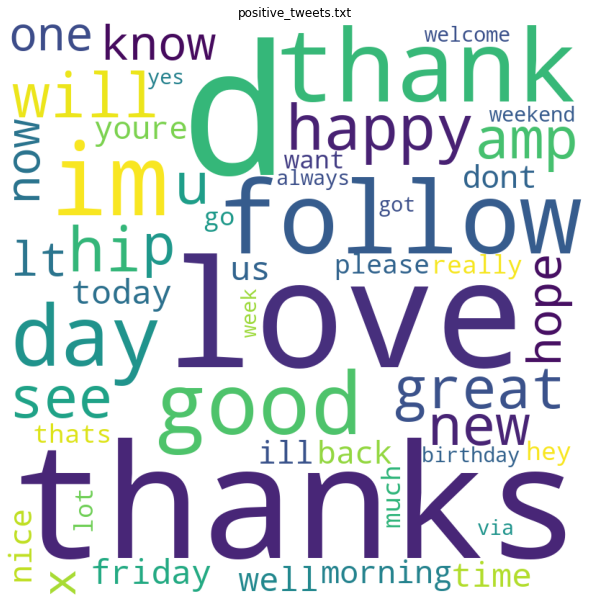

In [23]:
Word_Cloud('positive_tweets.txt')

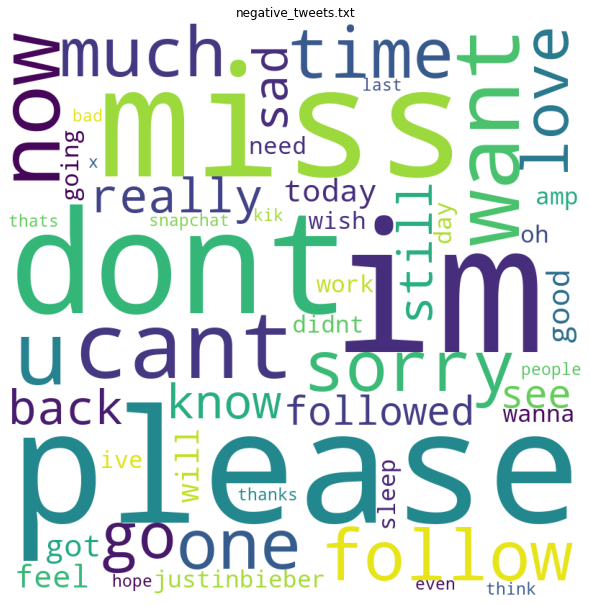

In [24]:
Word_Cloud('negative_tweets.txt')

We can see the results make sense more in the positive tweets than in the negative tweets, as some words emphasized in the negative tweets can relate as positive words (for example: 'please', 'love'). However, we can still see a higher proportion of strong positive words in the 'positive tweets' than in the 'negative tweets'.

<b>Let's use tf-idf to support wordcloud findings</b>

In [25]:
def tfidf_wordcloud(filename):
    with open(filename, 'r') as file:
            pos_tweets = file.read() 

    pos_tweets = TextClean(pos_tweets)

    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform([pos_tweets])
    feature_names = vectorizer.get_feature_names_out()
    df = pd.DataFrame(vectors.todense().tolist(), columns=feature_names)

    cloud = WordCloud(width = 800, height = 800, background_color ='white', 
                              max_words=50, relative_scaling=0.21, stopwords = set(STOPWORDS), 
                              min_font_size = 10).generate_from_frequencies(df.T.sum(axis=1)) #sum tf-idf for each word in corpus

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(filename)
    plt.show()
    
    return

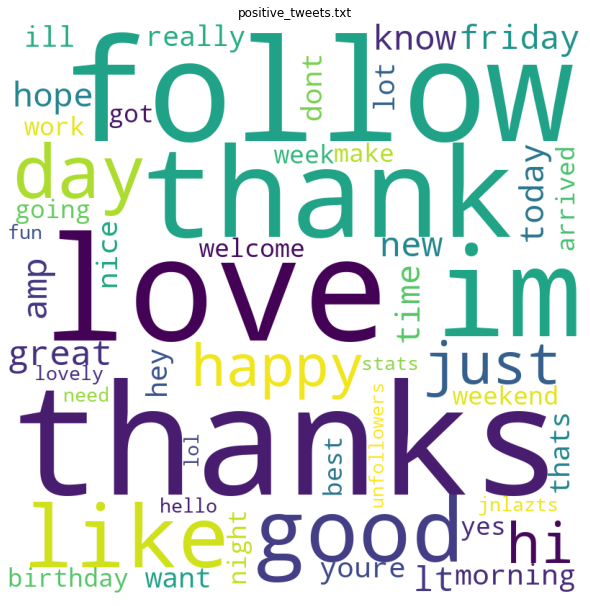

In [26]:
tfidf_wordcloud('positive_tweets.txt')

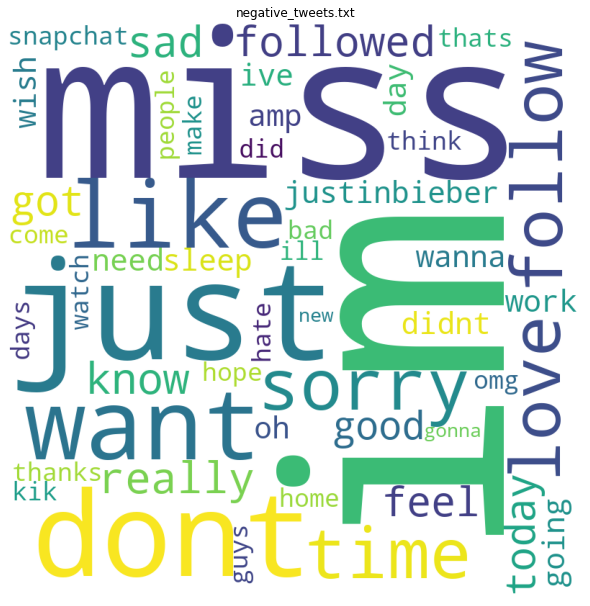

In [27]:
tfidf_wordcloud('negative_tweets.txt')

We can see that creating a word cloud according to the sum of tf-idf for each word in each of the positive and negative corpora, generates similar word clouds to simple word-frequency-count word clouds, and we can again see a higher proportion for positive words in the positive document. Those results can be explained by the fact that in a positive corpus we have positively-semantic words which repeat often across different tweets in the corpus, hence after summing tf-idfs for each word, we get those words emphasized in the word cloud. A similar conclusion can be drawn for the negatively-semantic corpus, however as said previously, we see more "neutral" words.